In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Распределение Тьюки

In [2]:
def Tukey(m, d, sigma, delta, n=200):
    #if (delta < 0) | (delta >= 0.5) | (sigma <= d):
     #   raise Exception("Дельта от 0 до 0.5")
    X = [random.gauss(m, d) for i in range(n)]
    Y = [random.gauss(m, sigma) for i in range(n)]
    Z = [random.random() for i in range(n)]
    U = [X[i] if Z[i] > delta else Y[i] for i in range(n)]
    return U

## Критерий Стьюдента

In [3]:
def sample_mean(X):
    return sum(X) / len(X)

def Student(X, Y):
    X_ = sample_mean(X)
    Y_ = sample_mean(Y)
    m = len(X)
    n = len(Y)
    S = ((sum([(x - X_) ** 2 for x in X]) + sum([(y - Y_) ** 2 for y in Y])) / (m + n)) ** 0.5
    T = - (X_ - Y_) / (S * (1 / m + 1 / n) ** 0.5)
    if T > 1.65:
        return 1
    return 0

## Критерий Вилкоксона

In [4]:
def rangs(X, Y):
    Z = sorted(X + Y)
    R = []
    XY = []
    i = 1
    while i <= len(Z):
        c = Z.count(Z[i - 1])
        if c == 1:
            R.append(i)
            if Z[i - 1] in X:
                XY.append('x')
            else:
                XY.append('y')
        else:
            xs = X.count(Z[i - 1])
            for j in range(c):
                R.append(i + (c - 1) / 2)
            for j in range(xs):
                XY.append('x')
            for j in range(c - xs):
                XY.append('y')
        i += c
    return R, XY

def Wilcoxon(X, Y):
    m = len(X)
    n = len(Y)
    R, XY = rangs(X, Y)
    W = sum([R[i] for i in range(len(R)) if XY[i] == 'y'])
    M = (m + n + 1) * m / 2
    D = (m + n + 1) * m * n / 12
    W_ = (W - M) / D ** 0.5
    if W_ > 1.645:
        return 1
    return 0

## Построение графика

In [5]:
def graphic(a_Student, a_Wilcoxon, param, label):
    fig = plt.figure(figsize=(15, 5))
    grid = plt.grid(True) 

    plt.title(label)
    plt.plot(param, a_Student, '*', color='red')
    plt.plot(param, a_Wilcoxon, '+', color='blue')
    plt.plot(param, a_Student, color='red')
    plt.plot(param, a_Wilcoxon, color='blue')
    plt.legend(['Стьюдент', 'Вилкоксон', 'Линия Стьюдента', 'Линия Вилкоксона'])

    plt.show()

## Меняем сигму

In [6]:
n = 1000
O = 3
delta = 0.1
d = 4

sigma = [i for i in range(15, 30)]
a_Student = []
a_Wilcoxon = []

In [7]:
for s in sigma:
    res_Student = []
    res_Wilcoxon = []
    for i in range(n):
        X = Tukey(0, d, s, delta)
        Y = Tukey(O, d, s, delta)
        res_Student.append(Student(X, Y))
        res_Wilcoxon.append(Wilcoxon(X, Y))
    a_Student.append((len(res_Student) - sum(res_Student)) / len(res_Student))
    a_Wilcoxon.append((len(res_Wilcoxon) - sum(res_Wilcoxon)) / len(res_Wilcoxon))

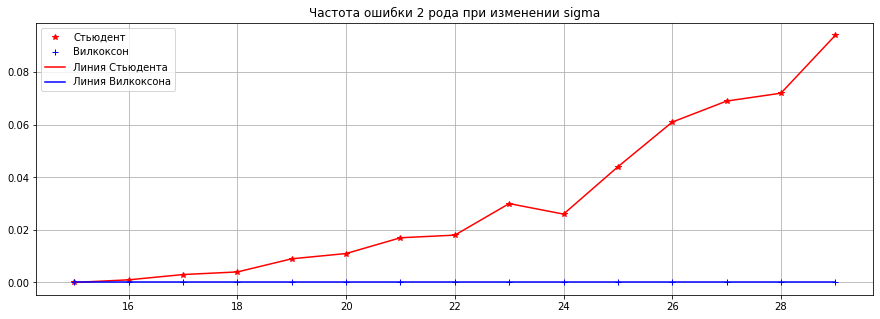

In [8]:
graphic(a_Student, a_Wilcoxon, sigma, "Частота ошибки 2 рода при изменении sigma")

## Меняем дельту

In [9]:
n = 1000
O = 3
sigma = 10
d = 4

delta = np.arange(0, 1, 0.05)
a_Student = []
a_Wilcoxon = []

In [10]:
for dlt in delta:
    res_Student = []
    res_Wilcoxon = []
    for i in range(n):
        X = Tukey(0, d, sigma, dlt)
        Y = Tukey(O, d, sigma, dlt)
        res_Student.append(Student(X, Y))
        res_Wilcoxon.append(Wilcoxon(X, Y))
    a_Student.append((len(res_Student) - sum(res_Student)) / len(res_Student))
    a_Wilcoxon.append((len(res_Wilcoxon) - sum(res_Wilcoxon)) / len(res_Wilcoxon))

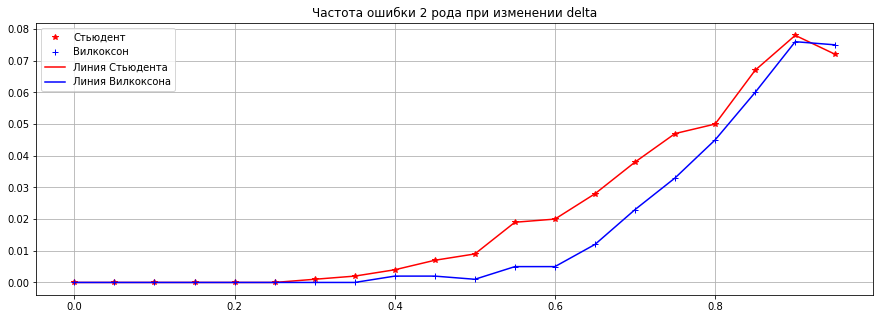

In [11]:
graphic(a_Student, a_Wilcoxon, delta, "Частота ошибки 2 рода при изменении delta")

## Меняем тетту

In [12]:
n = 1000
delta = 0.1
sigma = 10
d = 4

O = [i for i in np.arange(0, 2, 0.1)]
a_Student = []
a_Wilcoxon = []

In [13]:
for o in O:
    res_Student = []
    res_Wilcoxon = []
    for i in range(n):
        X = Tukey(0, d, sigma, delta)
        Y = Tukey(o, d, sigma, delta)
        res_Student.append(Student(X, Y))
        res_Wilcoxon.append(Wilcoxon(X, Y))
    a_Student.append((len(res_Student) - sum(res_Student)) / len(res_Student))
    a_Wilcoxon.append((len(res_Wilcoxon) - sum(res_Wilcoxon)) / len(res_Wilcoxon))

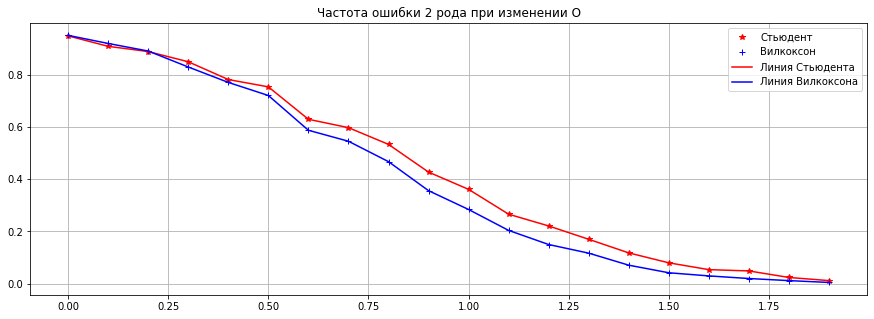

In [14]:
graphic(a_Student, a_Wilcoxon, O, "Частота ошибки 2 рода при изменении O")